# Project UAS Desain Analisis dan Algoritma
Implementasi Algoritma Sorting, Sorting Harga Suatu Produk pada E-Commerce, Menggunakan Data dengan Scraping dan Web Automation
Modules and Packages
Module dan Python package yang digunakan :

In [21]:
import time
import undetected_chromedriver as UC
import matplotlib.pyplot as plt

from selenium.common.exceptions import *
from selenium.webdriver.support.ui import WebDriverWait as wd
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException

# Scraping Data
Proses scraping pengambilan dan otomatisasi program :

Selenium patched. Safe to import Chrome / ChromeOptions


----- Opsi Chrome -----

Headless / Normal : Headless
Proxy / Socks5 / None : None


Selenium patched. Safe to import Chrome / ChromeOptions



-------------------------------

Masukan barang yang dicari : Iphone HDC
Input rentang harga terendah : 1000000
Input rentang harga tertinggi : 3000000
Input jumlah barang untuk di sorting : 6


----- List Nama Produk -----
- iPhone 6s 16 - iphone 6s 64 - Iphone 6s 128GB APPLE IPHONE MURAH GARANSI 1 TAHUN bukan HDC BISA SEMUA OPERATOR
- Apple iPhone 6 16 - 64 -128 GB - Garansi 1 Tahun Original bukan HDC/Replika
- Apple iPhone 6 16gb - 32gb - 64gb -128gb - Garansi 1 Tahun Original bukan HDC/Replika
- APPLE IPHONE 7 GARANSI IPHONE MURAH ORIGINAL BUKAN HDC
- iphone 11 pro max HDC 4G 3/512gb
- IPHONE 8+ hdc


----- List Harga Produk -----
- 2696000
- 2499000
- 2590000
- 3700000
- 2550000
- 3696000
6
[2696000.0, 2499000.0, 2590000.0, 3700000.0, 2550000.0, 3696000.0]
[1, 2, 3, 4, 5, 6]

 List setelah menggunakan bubble sort    : 
 [2499000.0, 2550000.0, 2590000.0, 2696000.0, 3696000.0, 3700000.0]

 List setelah menggunakan insertion sort : 
 [2499000.0, 2550000.0, 2590000.0, 2696000.0, 3696

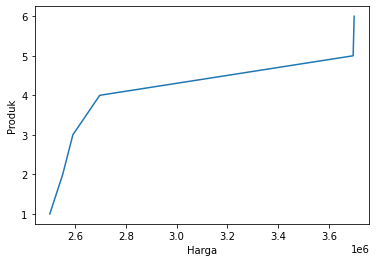

In [22]:
UC.TARGET_VERSION = 87

class ScrapeData:

    def __init__(self):
        opsi = UC.ChromeOptions()
        print("----- Opsi Chrome -----\n")
        set_gui = input("Headless / Normal : ")
        if set_gui == "headless":
            opsi.headless = True
            opsi.add_argument('--headless')
        else:
            opsi.headless = False
            opsi.add_argument('start-maximized')

        set_server = input("Proxy / Socks5 / None : ")
        if set_server.lower == "proxy":
            proxy_server = input("Masukan proxy : ")
            opsi.add_argument(f"--proxy-server={proxy_server}")
        elif set_server.lower == "socks5":
            socks5_server = input("Masukan socks5 : ")
            opsi.add_argument(f"--proxy-server=socks5://{socks5_server}")
        else:
            pass
        opsi.add_argument('--disable-extensions')
        prefs = {"profile.default_content_setting_values.notifications": False,
        "credentials_enable_service": False, 
        "profile.password_manager_enabled" : False}
        self.browser = UC.Chrome(options=opsi, enable_console_log=True)
        self.browser.get("https://lazada.co.id")

    def search_produk(self, nama_barang):
        try:
            produk = wd(self.browser, 100).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="q"]')))
        except NoSuchElementException as e:
            print(e)
        self.browser.execute_script("arguments[0].click();", produk)
        produk.send_keys(nama_barang, Keys.RETURN)

    def filter_produk(self, harga, harga_max):
        self.harga = harga
        self.harga_max = harga_max
        try:
            filter = wd(self.browser, 1000).until(EC.element_to_be_clickable((
                By.XPATH, '//*[@id="root"]/div/div[2]/div[1]/div/div[2]/div/div[6]/div[2]/div/input[1]')))
            self.browser.execute_script("arguments[0].click();", filter)
            filter.send_keys(harga)
            filter2 = wd(self.browser, 1000).until(EC.element_to_be_clickable((
                By.XPATH, '//*[@id="root"]/div/div[2]/div[1]/div/div[2]/div/div[6]/div[2]/div/input[2]')))
            self.browser.execute_script("arguments[0].click();", filter2)
            filter2.send_keys(harga_max)
            click = wd(self.browser, 1000).until(EC.element_to_be_clickable((
                By.XPATH, '//*[@id="root"]/div/div[2]/div[1]/div/div[2]/div/div[6]/div[2]/div/button')))
            self.browser.execute_script("arguments[0].click();", click)
        except NoSuchElementException as e:
            print(e)
        except ElementClickInterceptedException as a:
            print(a)

    def scraping_element_list(self):
        try:
            self.nama_produk = self.browser.find_elements(By.CLASS_NAME, 'c16H9d')
            self.harga_produk = self.browser.find_elements(By.CLASS_NAME, 'c3gUW0')
        except NoSuchElementException as e:
            print(e)
    
    def list_manipulating(self, jumlah):
        self.jumlah = jumlah
        self.list_nama = []
        self.list_harga = []
        print("\n")
        for nama in self.nama_produk:
            self.list_nama.append(nama.text)
            a = len(self.list_nama)
            if a == self.jumlah:
                break
            continue

        for harga in self.harga_produk:
            self.list_harga.append(harga.text)
            b = len(self.list_harga)
            if b == self.jumlah:
                break
            continue
            
    def output_list(self):
        self.list_harga = [i.replace('Rp', '').replace('.', '') for i in self.list_harga]
        print("----- List Nama Produk -----")
        y = 0
        for x in self.list_nama:
            print("-", self.list_nama[y])
            y += 1
        print("\n")
        print("----- List Harga Produk -----")
        z = 0
        for x in self.list_harga:
            print("-", self.list_harga[z])
            z += 1
        
    def convert_list(self):
        self.x = [float(i) for i in self.list_harga]
        haha = len(self.list_nama)
        print(haha)
        i = 0
        j = 1
        self.y = []
        for z in range(haha):
            self.y.insert(i, f"{j}")
            i += 1
            j += 1
        self.y = [int(k) for k in self.y]
        print(self.x)
        print(self.y)
        
    def bubble_sort(self, list):
        lastElementIndex = len(list)-1
        for passNo in range(lastElementIndex,0,-1):
            for idx in range(passNo):
                if list[idx]>list[idx+1]:
                    list[idx],list[idx+1]=list[idx+1],list[idx]
        return list
        
    def insertion_sort(self, list):
        for i in range(1, len(list)):
            j = i-1
            next = list[i]
    
    
            while (list[j] > next) and (j >= 0):
                list[j+1] = list[j]
                j=j-1
            list[j+1] = next
        return list
    
    def selection_sort (self, list):
        for fill_slot in range(len(list) - 1, 0, -1):
            max_index = 0
            for location in range(1, fill_slot + 1):
                if list[location] > list[max_index]:
                    max_index = location
            list[fill_slot],list[max_index] = list[max_index],list[fill_slot]
        return list
        
    def plotting(self):
        plt.plot(self.x, self.y)
        plt.xlabel('Harga')
        plt.ylabel('Produk')
        plt.show()

    def main(self):
        print("\n-------------------------------\n")
        nama_barang = input("Masukan barang yang dicari : ")
        harga = input("Input rentang harga terendah : ")
        harga_max = input("Input rentang harga tertinggi : ")
        jumlah = int(input("Input jumlah barang untuk di sorting : "))
        try:
            self.search_produk(nama_barang)
            self.filter_produk(harga, harga_max)
            self.scraping_element_list()
        except TimeoutException as e:
            print(e)

        self.list_manipulating(jumlah)
        self.output_list()
        self.convert_list()
        self.bubble_sort(self.x)
        self.insertion_sort(self.x)
        self.selection_sort(self.x)
        print("\n List setelah menggunakan bubble sort    : \n", self.x)
        print("\n List setelah menggunakan insertion sort : \n", self.x)
        print("\n List setelah menggunakan selection sort : \n", self.x)
        self.plotting()

if __name__ == "__main__":
    a = ScrapeData()
    a.main()